<a href="https://colab.research.google.com/github/natsakh/IAD/blob/main/Pr_1/1_4_Intro_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to Pandas
Pandas is a software library written for the Python programming language for data manipulation and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns = ['A', 'B', 'C', 'D']
data = np.array([[1, 2, -1, 0], [3, -1, 2, 5], [-1, 4, 0, 2], [-1, -2, 3, 0]])
df = pd.DataFrame(data=data, columns=columns)

In [3]:
df

,A,B,C,D
0,1,2,-1,0
1,3,-1,2,5
2,-1,4,0,2
3,-1,-2,3,0


In [4]:
df['A']

,A
0,1
1,3
2,-1
3,-1


In [5]:
df[['A', 'C']]

,A,C
0,1,-1
1,3,2
2,-1,0
3,-1,3


In [6]:
# new column
df['E'] = df['A'] + df['B']

# Exploring the Data

In [7]:
# Show the first 5 rows
print("Head (first 5 rows):")
print(df.head())

# Show the last 2 rows
print("\nTail (last 2 rows):")
print(df.tail(2))

# General info about the DataFrame (data types, non-null counts, memory usage)
print("\nInfo:")
print(df.info())

# Basic statistics for numeric columns
print("\nDescribe:")
print(df.describe())

# Shape of the DataFrame (rows, columns)
print("\nShape:")
print(df.shape)

# Column names
print("\nColumns:")
print(df.columns)

# Index (row labels)
print("\nIndex:")
print(df.index)

# Values as a NumPy array
print("\nValues:")
print(df.values)


Head (first 5 rows):
   A  B  C  D  E
0  1  2 -1  0  3
1  3 -1  2  5  2
2 -1  4  0  2  3
3 -1 -2  3  0 -3

Tail (last 2 rows):
   A  B  C  D  E
2 -1  4  0  2  3
3 -1 -2  3  0 -3

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4 non-null      int64
 1   B       4 non-null      int64
 2   C       4 non-null      int64
 3   D       4 non-null      int64
 4   E       4 non-null      int64
dtypes: int64(5)
memory usage: 292.0 bytes
None

Describe:
              A         B         C         D         E
count  4.000000  4.000000  4.000000  4.000000  4.000000
mean   0.500000  0.750000  1.000000  1.750000  1.250000
std    1.914854  2.753785  1.825742  2.362908  2.872281
min   -1.000000 -2.000000 -1.000000  0.000000 -3.000000
25%   -1.000000 -1.250000 -0.250000  0.000000  0.750000
50%    0.000000  0.500000  1.000000  1.000000  2.500000
75%    1.500000  2.

#Indexing and Selecting Data

In [8]:
# Access by row index and column label
print("\nValue at row 0, column 'A':")
print(df.loc[0, 'A'])

# Access by row and column position (row 2, column 3 -> 3rd row, 4th column)
print("\nValue at row 2, column 3 (using iloc):")
print(df.iloc[2, 3])

# Select rows by position (rows 1 to 2, since Python slicing is exclusive at the end)
print("\nRows from position 1 to 2 (iloc[1:3]):")
print(df.iloc[1:3])

# Conditional selection: rows where column 'B' < 0
print("\nRows where column 'B' is less than 0:")
print(df.loc[df['B'] < 0])

# loc - "labels" (row/column names); slicing is inclusive of the end index.
# iloc - "integer location" (row/column positions); slicing excludes the end index (like standard Python slicing).



Value at row 0, column 'A':
1

Value at row 2, column 3 (using iloc):
2

Rows from position 1 to 2 (iloc[1:3]):
   A  B  C  D  E
1  3 -1  2  5  2
2 -1  4  0  2  3

Rows where column 'B' is less than 0:
   A  B  C  D  E
1  3 -1  2  5  2
3 -1 -2  3  0 -3


#Basic Statistical Operations

In [9]:
# Mean of column 'A'
print("\nMean of column A:")
print(df['A'].mean())

# Sum of column 'B'
print("\nSum of column B:")
print(df['B'].sum())

# Maximum value in each column
print("\nMaximum value in each column:")
print(df.max())

# Minimum value in each column
print("\nMinimum value in each column:")
print(df.min())

# Correlation matrix between all numeric columns
print("\nCorrelation matrix:")
print(df.corr())


Mean of column A:
0.5

Sum of column B:
3

Maximum value in each column:
A    3
B    4
C    3
D    5
E    3
dtype: int64

Minimum value in each column:
A   -1
B   -2
C   -1
D    0
E   -3
dtype: int64

Correlation matrix:
          A         B         C         D         E
A  1.000000 -0.284463  0.000000  0.699874  0.393939
B -0.284463  1.000000 -0.861892 -0.115262  0.769103
C  0.000000 -0.861892  1.000000  0.231800 -0.826334
D  0.699874 -0.115262  0.231800  1.000000  0.356076
E  0.393939  0.769103 -0.826334  0.356076  1.000000


#Column Operations

In [10]:
# Create a new column 'F' as 10 times the values of column 'C'
df['F'] = df['C'] * 10
print("\nAfter adding new column 'F' = C * 10:")
print(df)

# Rename column 'A' to 'Alpha'
df.rename(columns={'A': 'Alpha'}, inplace=True)
print("\nAfter renaming column 'A' to 'Alpha':")
print(df)

# Drop column 'D' (not inplace → original DataFrame stays the same)
dropped_df = df.drop('D', axis=1)
print("\nAfter dropping column 'D' (temporary result, df is unchanged):")
print(dropped_df)

print("\nOriginal DataFrame df:")
print(df)

print("\nOverwrite df with the new DataFrame (inplace=True):")
df.drop('D', axis=1, inplace=True)  # column 'D' is removed directly from df
print(df)


After adding new column 'F' = C * 10:
   A  B  C  D  E   F
0  1  2 -1  0  3 -10
1  3 -1  2  5  2  20
2 -1  4  0  2  3   0
3 -1 -2  3  0 -3  30

After renaming column 'A' to 'Alpha':
   Alpha  B  C  D  E   F
0      1  2 -1  0  3 -10
1      3 -1  2  5  2  20
2     -1  4  0  2  3   0
3     -1 -2  3  0 -3  30

After dropping column 'D' (temporary result, df is unchanged):
   Alpha  B  C  E   F
0      1  2 -1  3 -10
1      3 -1  2  2  20
2     -1  4  0  3   0
3     -1 -2  3 -3  30

Original DataFrame df:
   Alpha  B  C  D  E   F
0      1  2 -1  0  3 -10
1      3 -1  2  5  2  20
2     -1  4  0  2  3   0
3     -1 -2  3  0 -3  30

Overwrite df with the new DataFrame (inplace=True):
   Alpha  B  C  E   F
0      1  2 -1  3 -10
1      3 -1  2  2  20
2     -1  4  0  3   0
3     -1 -2  3 -3  30


#Sorting and Finding Unique/Value Counts

In [11]:
# Sort by one column ('B')
print("\nSort by column 'B':")
print(df.sort_values('B'))

# Get unique values from column 'B'
print("\nUnique values in column 'B':")
print(df['B'].unique())

# Count frequency of each unique value in column 'B'
print("\nValue counts for column 'B':")
print(df['B'].value_counts())


Sort by column 'B':
   Alpha  B  C  E   F
3     -1 -2  3 -3  30
1      3 -1  2  2  20
0      1  2 -1  3 -10
2     -1  4  0  3   0

Unique values in column 'B':
[ 2 -1  4 -2]

Value counts for column 'B':
B
 2    1
-1    1
 4    1
-2    1
Name: count, dtype: int64


#Handling Missing Data

In [12]:
# Introduce a missing value (NaN) in column 'C' at row 0
df.loc[0, 'C'] = np.nan
print("\nAfter introducing a missing value in row 0, column 'C':")
print(df)

# Count missing values in each column
print("\nNumber of missing values in each column:")
print(df.isnull().sum())

# Fill missing values with 0 (this returns a new DataFrame)
print("\nFill missing values with 0 (does not modify df permanently):")
print(df.fillna(0))

# Drop rows that contain any missing values (returns a new DataFrame)
print("\nDrop rows with NaN values (temporary result, df remains unchanged):")
print(df.dropna())

# Show the original DataFrame (to confirm it's not changed)
print("\nOriginal DataFrame is still unchanged:")
print(df)


After introducing a missing value in row 0, column 'C':
   Alpha  B    C  E   F
0      1  2  NaN  3 -10
1      3 -1  2.0  2  20
2     -1  4  0.0  3   0
3     -1 -2  3.0 -3  30

Number of missing values in each column:
Alpha    0
B        0
C        1
E        0
F        0
dtype: int64

Fill missing values with 0 (does not modify df permanently):
   Alpha  B    C  E   F
0      1  2  0.0  3 -10
1      3 -1  2.0  2  20
2     -1  4  0.0  3   0
3     -1 -2  3.0 -3  30

Drop rows with NaN values (temporary result, df remains unchanged):
   Alpha  B    C  E   F
1      3 -1  2.0  2  20
2     -1  4  0.0  3   0
3     -1 -2  3.0 -3  30

Original DataFrame is still unchanged:
   Alpha  B    C  E   F
0      1  2  NaN  3 -10
1      3 -1  2.0  2  20
2     -1  4  0.0  3   0
3     -1 -2  3.0 -3  30


## Titanic dataset

In [13]:
#https://www.kaggle.com/c/titanic/data

url='https://drive.google.com/file/d/1zyYJMa75UXLjmODPRnl4_UrLJ0JKmEOC/view?usp=sharing'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_train = pd.read_csv(url_)

In [14]:
df_train.shape

(891, 12)

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df_train[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [18]:
df_train['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [19]:
df_train['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [20]:
df_train[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


## Data Visualization with seaborn

### Missing Data

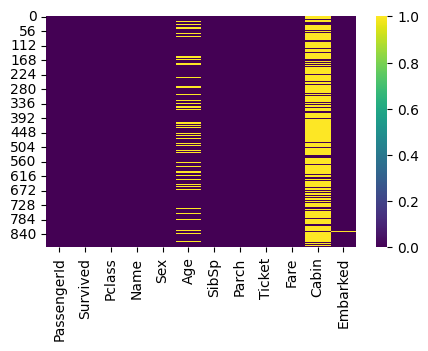

In [21]:
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(df_train.isnull(), cmap='viridis')
plt.show()

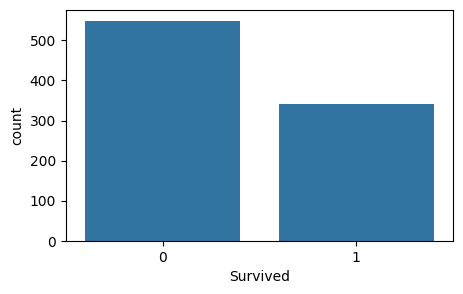

In [22]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',data=df_train) # Countplot of survival status (0 = did not survive, 1 = survived)
plt.show()

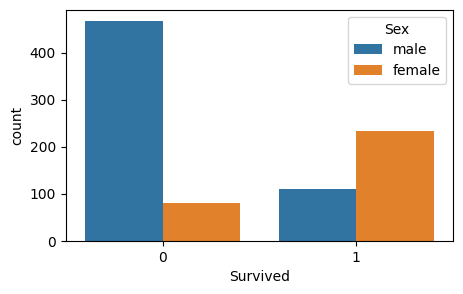

In [23]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',hue='Sex',data=df_train) # The `hue='Sex'` argument splits each bar into sub-bars by gender
plt.show()

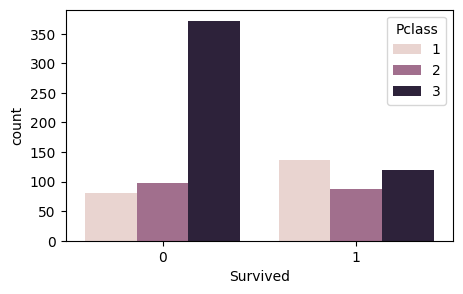

In [24]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',hue='Pclass',data=df_train)# This lets us compare survival counts across different passenger classes
plt.show()

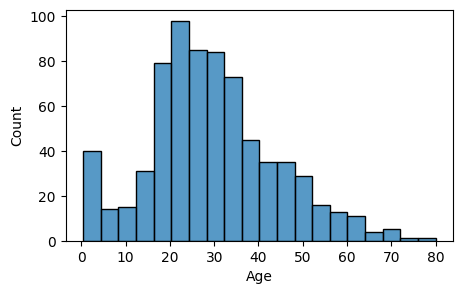

In [25]:
plt.figure(figsize=(5,3))
sns.histplot(df_train['Age'])
plt.show()

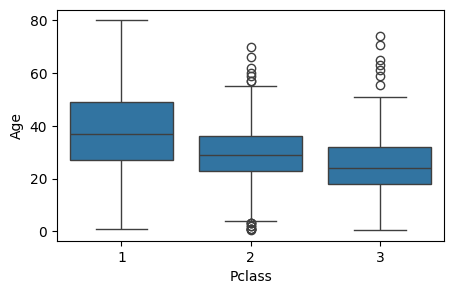

In [26]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Pclass',y='Age',data=df_train)
plt.show()
# Boxplot of passenger Age by Passenger Class (Pclass)
# - The x-axis shows passenger classes (1st, 2nd, 3rd).
# - The y-axis shows the distribution of ages in each class.
# - Each box shows the interquartile range (IQR: 25th–75th percentile).
# - The line inside the box represents the median age.
# - The "whiskers" show the range of most data points.
# - Dots outside the whiskers are outliers.